<a href="https://colab.research.google.com/github/emmad225/BIACoursework/blob/main/duffyep__lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [CSCI 3397/PSYC 3317] Lab 1: Image Operations

**Posted:** Wednesday, January 24, 2024

**Due:** Wednesday, January 31, 2024

__Total Points__: 10 pts

__Submission__: please rename the .ipynb file as __\<your_username\>_lab1.ipynb__ before you submit it to canvas. Example: weidf_lab1.ipynb.

# <b>1. Numpy for Matrix Manipulation</b>

Numpy is a numerical library that provides **_tons_** of useful functions for scalar, array, and matrix types. We'll only go into a small scratch of numpy.

**Why numpy instead of regular `for` loops**? \
In addition to the convenience of not redesigning the wheel, much of Numpy is built directly in C++ and is well optimized, so it runs *very* fast

Let's import numpy now! It is customary to call it `np`, since you need to reference it a lot.

In [ ]:
import numpy as np

## 1.1 Arrays, Matrices, and Tensors

### Array
One of the most important primitives in numpy is the `np.array` - this represents a fixed-size array (or list) of elements.

Unlike Python lists, numpy arrays **MUST HAVE THE SAME TYPE**. The types allowed by numpy are below. Note that you have greater control over how much space is used by each datatype than Python primitives:
- float16, float32, float64 (decimal values)
- int8, int16, int32, int64 (integers)
- uint8, uint16, uint32, uint64 (unsigned, or positive, integers)
- bool (boolean)
- complex64, complex128 (Complex numbers, represented as 2 floats)

All of these types have a default size that you can access with `np.float`, `np.int`, and so on.

Let's make an array from a Python list!

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print("A is", a)
print("Object Type:",type(a))

A is [1 2 3 4 5 6 7 8]
Object Type: <class 'numpy.ndarray'>


Let's see what type numpy inferred from our data

In [ ]:
a.dtype

dtype('int64')

We can access elements of an array using the same `[]` notation we're used to. We can even use negatives to index from the end, and make slices.

In [ ]:
print(a[1])
print(a[-1])
print(a[0:6:2]) # index start from 0, end at 6, step = 2

2
8
[1 3 5]


Since arrays have a fixed size, we can get this size as a tuple using the `shape` attribute - you can't set this though!

In [ ]:
print(a.shape)

(8,)


We can also change elements of the array - we just can't add new elements

In [ ]:
a[0] = 100
print(a)

[100   2   3   4   5   6   7   8]


Since `a` and `b` are numpy arrays, we can do math with them now! These operations, by default, will happen out-of-place (a new array will be created to store the result)

In [ ]:
print("Numpy math:")
print(a[:3],"+",a[-3:],"=",a[:3] + a[-3:])

# If they weren't numpy arrays
print("\nVanilla Python List math:")
print(list(a),"+",list(a[:3]),"=",list(a) + list(a[:3]))

Numpy math:
[100   2   3] + [6 7 8] = [106   9  11]

Vanilla Python List math:
[100, 2, 3, 4, 5, 6, 7, 8] + [100, 2, 3] = [100, 2, 3, 4, 5, 6, 7, 8, 100, 2, 3]


This is a small example, but we'll soon see more complicated operations numpy arrays can perform!

### Matrix
We can also make matrices, by simply giving the constructor the correct shape of data

In [ ]:
my_matrix = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)
print(my_matrix)

[[1 2 3]
 [4 5 6]]


Now, using shape will be more helpful - note that you couldn't get this shape with a Python list!

In [ ]:
print(my_matrix.shape)

(2, 3)


We can access matrix elements using each of their indices in order. (All dimensions are 0-indexed)

In [ ]:
print(my_matrix[0,2]) # Get row 0, column 2. The order of these indices matches their respective maximums in shape.

3


We can still use slices, and negative indexing. Slicing a row or column from a matrix gives us a 1d array!

In [ ]:
# Get row 0, all columns except the last one
print(my_matrix[0,:-1])

# Get columns 1 and 2.
print(my_matrix[:, 1:3])

[1 2]
[[2 3]
 [5 6]]


We can also still index into this as an outer-array

In [ ]:
# Gets the 0th element of the outer array - that's the 0th row!
print(my_matrix[0])

[1 2 3]


**NOTE:** Matrices in numpy MUST be rectangular. Unlike nested Python lists, which can have the first list contain 1 element, and the second list contain 3 elements, in a numpy matrix, all rows have to have the same length. In other words, the matrix cannot be "jagged"

So, we can actually shape these 6 elements into whatever shape we want! This can be useful to create high dimensional arrays.

In [ ]:
my_reshaped_matrix = my_matrix.reshape((3,2))
my_reshaped_matrix

array([[1, 2],
       [3, 4],
       [5, 6]])

Unless you explicitly use `np.copy`, Reshapes and slices create *views* of your data - that is, they all reference the same data! So, since the variables are all aliases to the same data, changes to one will reflect in all the others! This is a double-edged sword that can boost your performance, but might catch you off guard.

In [ ]:
print("Original my_matrix")
print(my_matrix)
print("Original my_reshaped_matrix")
print(my_reshaped_matrix)

# Change an element
print("===MAKING A CHANGE===")
my_matrix[0,0] = 100 - my_matrix[0, 0]

print("New my_matrix")
print(my_matrix)
print("New my_reshaped_matrix")
print(my_reshaped_matrix)

Original my_matrix
[[1 2 3]
 [4 5 6]]
Original my_reshaped_matrix
[[1 2]
 [3 4]
 [5 6]]
===MAKING A CHANGE===
New my_matrix
[[99  2  3]
 [ 4  5  6]]
New my_reshaped_matrix
[[99  2]
 [ 3  4]
 [ 5  6]]


### The third dimension and beyond

We were able to add a dimension to a 1d array to make a 2d matrix.
In fact, numpy can handle even more dimensions!
In computer vision, we often will use 3 dimensions worth of data (Height x Width x 3 colors)

A "matrix" with 3 or more dimensions is called a *Tensor*.  
Let's make a 2 x 3 x 4 tensor (2 stacked 3x4 matrices)

In [ ]:
my_tensor = np.array(range(2*3*4)).reshape(2,3,4)
print(my_tensor)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


We can use a tensor like any matrix or array

In [ ]:
# Get the 0th matrix slice, the 1st row of that matrix, and the 2nd column of that row
print(my_tensor[0,1,2])

6


## 1.2 Array Creation
Numpy also provides several convenience functions to help you make make empty ndarrays

In [ ]:
desired_shape = (2,3)

Some useful ones:
- zeros: Creates an array filled with zeros
- ones: An array of ones
- eye: The identity matrix I (needs 1 integer for square size)
- full: Fills with an element
- np.random.random: Random between 0 and 1

In [ ]:
print(np.zeros(desired_shape)          , '\n')
print(np.ones(desired_shape)           , '\n')
print(np.eye(3)                        , '\n')
print(np.full(desired_shape, 7)        , '\n')
print(np.random.random(desired_shape)  , '\n')

[[0. 0. 0.]
 [0. 0. 0.]] 

[[1. 1. 1.]
 [1. 1. 1.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[7 7 7]
 [7 7 7]] 

[[0.31714946 0.72123152 0.81791062]
 [0.56151378 0.9536344  0.3961199 ]] 



If you want to create an array ranging from 0 to 10

In [ ]:
np.arange(10+1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## 1.3 Array Indexing

We've already done a lot of indexing into arrays above, but let's look at some more details

In [ ]:
my_tensor = np.array(range(2*3*4)).reshape(2,3,4).astype(np.int)
my_tensor

<ipython-input-20-7826adda02ca>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_tensor = np.array(range(2*3*4)).reshape(2,3,4).astype(np.int)


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

### Getting Elements
We can get elements by fully specifying the index

In [ ]:
my_tensor[0,1,2]

6

If we partially specify the index (in order), since this is a list-of-lists, basically, we'll get "rows" (or matrices, if taking parts of a tensor

In [ ]:
my_tensor[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
my_tensor[0, 0]

array([0, 1, 2, 3])

By this logic, we can also keep adding square brackets (get the matrix, then the row, then the column).

In [ ]:
my_tensor[0][0]

array([0, 1, 2, 3])

We can also use standard slice notation. Again, we don't have to specify all the dimensions

In [ ]:
my_tensor[0, 0:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

### Setting elements

We can set elements that we index to

In [ ]:
my_tensor[0, 0, 0] = 100
my_tensor

array([[[100,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

We can also set blocks / slices that we index into, as long as the shapes match! (some more details: this copies values, no longer references)

In [ ]:
# Get the 0th matrix slice. Rows 1 and 2. Get every other column starting from 0
my_tensor[0,1:3,0::2]

In [ ]:
replacement = (np.eye(2, dtype=np.int) + 2) * 100
replacement

In [ ]:
my_tensor[0, 1:3, 0::2] = replacement
my_tensor

We can also use a boolean tensor of the same size to index the tensor. For example, if we want to set everything smaller than 5 to 1 in the tensor.

In [ ]:
my_tensor[my_tensor < 5] = 1

## 1.4 Matrix/Vector Operations

Indexing and creating arrays is cool, but the real power of Numpy is doing math using those arrays.

### Elementwise arithmetics

The basic mathematical operators (+, -, /, \*, %) are treated as "elementwise" operators - they do something with each element. Which operands are used depends on a concept called "broadcasting". In practice - if you have two ndarrays of the same shape, then the operands will be corresponding elements in each ndarray. Otherwise, if possible, the smaller ndarray/scalar is repeated to be the same size as the larger array.

In [ ]:
a = np.array(range(10)).reshape(2,5)
b = np.array(range(100,1100,100)).reshape(2,5)
print("a =",  a  )
print("b =",  b  )

Operate on corresponding elements of a and b

In [ ]:
a + b

In [ ]:
a * b

We can also use scalars as operands, which will be "broadcast" to every element.

In [ ]:
a * 2

array([200,   4,   6,   8,  10,  12,  14,  16])

In [ ]:
b % 3

### Vector-vector: dot product
$a\cdot b = \sum_{i=0}^{n-1} a_ib_i$

In [ ]:
a = np.random.random(50)
b = np.random.random(50)
dot_np = np.dot(a, b)

### Matrix-vector: product

The **matrix-vector** multiplication bewteen a $m\times n$ matrix $A=\begin{bmatrix}a_{0,0}&\dots&a_{0,n-1} \\\vdots & \ddots &\vdots\\ a_{m-1,0} & \dots &a_{m-1,n-1}\end{bmatrix}$ and a $n\times 1$ vector $b=\begin{bmatrix}b_0\\\vdots\\b_{n-1}\end{bmatrix}$ is defined as follows:
$Ab = \begin{bmatrix}A_{0,*} \cdot b\\\vdots\\A_{m-1,*} \cdot b\end{bmatrix}$

In [ ]:
a = np.random.random([20,50])
b = np.random.random([50])
matrix_vector_np = np.matmul(a, b)

### Matrix-matrix product
$AB = \begin{bmatrix}AB_{*,0} & \dots & AB_{*,p-1}\end{bmatrix}$

or

$AB = \begin{bmatrix}A_{0,*} \cdot B_{*,0}^T & \dots & A_{0,*} \cdot B_{*,p-1}^T\\\vdots & \ddots & \vdots\\ A_{m-1,*} \cdot B_{*,0}^T & \dots & A_{m-1,*} \cdot B_{*,p-1}^T\end{bmatrix}$

In [ ]:
a = np.random.random([20, 50])
b = np.random.random([50, 10])
matrix_matrix_np = np.matmul(a, b)


# <b>2. Pixel-level operations (Lec. 4)</b>
In this section, you will reproduce the images in Lec. 4.

In [ ]:
# download image
! wget https://bc-cv.github.io/csci3397/public/dip_pixel/xray_image.png -O xray_image.png
! wget https://bc-cv.github.io/csci3397/public/dip_pixel/600px-Unequalized_Hawkes_Bay_NZ.jpg -O desert.jpg
! wget https://bc-cv.github.io/csci3397/public/biomed_image/microscopy_image.npy

--2024-01-31 20:42:31--  https://bc-cv.github.io/csci3397/public/dip_pixel/xray_image.png
Resolving bc-cv.github.io (bc-cv.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to bc-cv.github.io (bc-cv.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30934 (30K) [image/png]
Saving to: ‘xray_image.png’

xray_image.png      100%[===================>]  30.21K  --.-KB/s    in 0.003s  

2024-01-31 20:42:31 (9.99 MB/s) - ‘xray_image.png’ saved [30934/30934]

--2024-01-31 20:42:31--  https://bc-cv.github.io/csci3397/public/dip_pixel/600px-Unequalized_Hawkes_Bay_NZ.jpg
Resolving bc-cv.github.io (bc-cv.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to bc-cv.github.io (bc-cv.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28312 (28K) [image/jpeg]
Saving to: ‘desert.jpg’

desert.jpg          100%[===================>]  27.65K  --.-KB/

Read and visualize the X-ray image. The image looks washed out as most pixel values are high.

<ipython-input-4-187de6fcec97>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  I_xray = imread('xray_image.png')


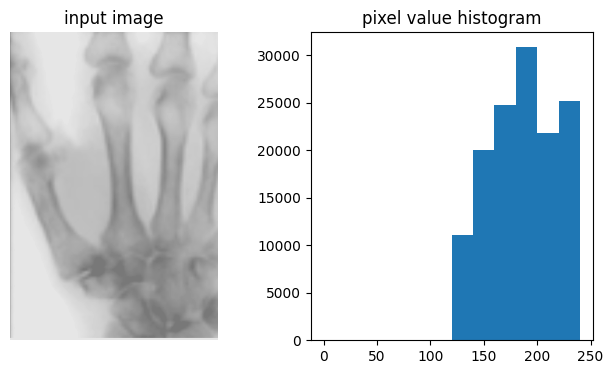

In [ ]:
from imageio import imread
import matplotlib.pyplot as plt

I_xray = imread('xray_image.png')

plt.figure(figsize=(8, 4))

# show the image
plt.subplot(121)
plt.imshow(I_xray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('input image')

# show the pixel value histogram
plt.subplot(122)
plt.hist(I_xray.reshape(-1), bins=range(0,255,20))
plt.title('pixel value histogram')

plt.show()

## 2.1 Algorithm

### Auto-contrast


Image data type:  uint8


Text(0.5, 1.0, 'I histogram')

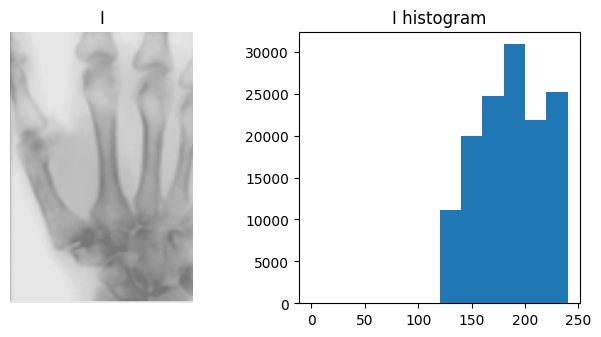

In [ ]:
import numpy as np
# Caveat II: imshow function automatically scale image
print('Image data type: ', I_xray.dtype)
plt.figure(figsize=(8, 12))

# input image and histogram
plt.subplot(321)
plt.imshow(I_xray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('I')

plt.subplot(322)
plt.hist(I_xray.reshape(-1), bins=range(0,255,20))
plt.title('I histogram')

# step 1: shift the histogram to left endpoint
I_xray_left = I_xray - I_xray.min()
plt.subplot(323)
plt.imshow(I_xray_left, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('I-shift-left')

plt.subplot(324)
plt.hist(I_xray_left.reshape(-1), bins=range(0,255,20))
plt.title('I-shift-left histogram')

# step 2: scale the histogram to right endpoint
I_xray_left_right = I_xray_left/float(I_xray.max()-I_xray.min())
I_xray_left_right = (I_xray_left_right * 255).astype(np.uint8)
plt.subplot(325)
plt.imshow(I_xray_left_right, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('final')

plt.subplot(326)
plt.hist(I_xray_left_right.reshape(-1), bins=range(0,255,20))
plt.title('final histogram')

### Histogram equalization

<a href="https://en.wikipedia.org/wiki/Histogram_equalization">Wikipedia link</a>

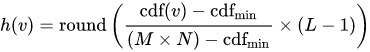

<ipython-input-6-f00bd6097945>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  I_xray = imread('xray_image.png')


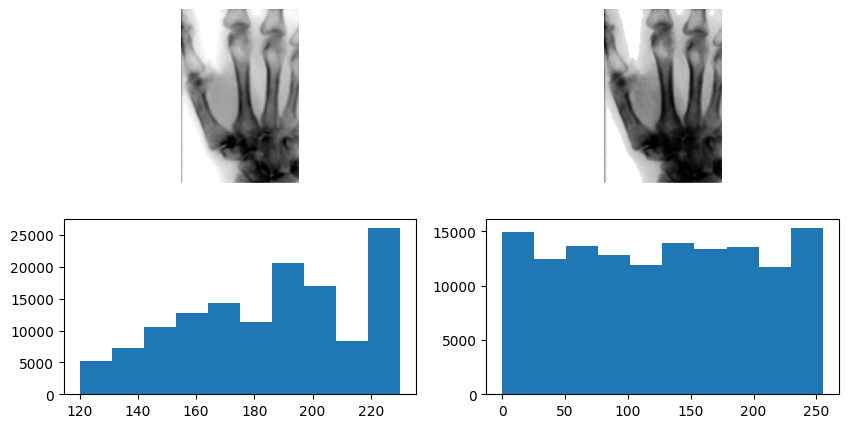

In [ ]:
I_xray = imread('xray_image.png')
# get statistics
unique_id, unique_count = np.unique(I_xray, return_counts=True)
I_xray_cdf = np.cumsum(unique_count)

# create the look up table
lookup = np.zeros(I_xray.max()+1,np.uint8)
lookup[unique_id] = 255*(I_xray_cdf-I_xray_cdf.min()).astype(float)/(I_xray.size-I_xray_cdf.min())

# output image
I_xray_eq = lookup[I_xray]

plt.figure(figsize=(10,5))
plt.subplot(221)
plt.imshow(I_xray, cmap='gray')
plt.axis('off')
plt.subplot(222)
plt.imshow(I_xray_eq, cmap='gray')
plt.axis('off')
plt.subplot(223)
plt.hist(I_xray.ravel())
plt.subplot(224)
plt.hist(I_xray_eq.ravel())
plt.show()


## 2.2 Coding


### Caveat 1: uint8 arithmetic

Image data type:  uint8


Text(0.5, 1.0, 'I-150 clipped')

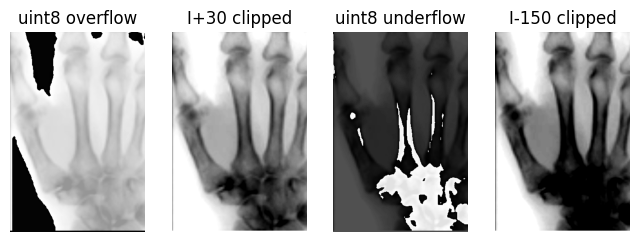

In [ ]:
# Caveat I: Be aware of uint8 arithmetics
print('Image data type: ', I_xray.dtype)
plt.figure(figsize=(8, 4))

# show the image
plt.subplot(141)
plt.imshow(I_xray+30, cmap='gray')
plt.axis('off')
plt.title('uint8 overflow')

plt.subplot(142)
plt.imshow(np.clip(I_xray.astype(float)+30,0,255), cmap='gray')
plt.axis('off')
plt.title('I+30 clipped')

plt.subplot(143)
plt.imshow(I_xray-150, cmap='gray')
plt.axis('off')
plt.title('uint8 underflow')


plt.subplot(144)
plt.imshow(np.clip(I_xray.astype(float)-150,0,255), cmap='gray')
plt.axis('off')
plt.title('I-150 clipped')

### Caveat 2: visualization auto-scale
We didn't talk about the caveat in class that `vmin=0, vmax=255` is actually critical in our experiments, as `imshow()` automatically scale the image to 0-1.

In [ ]:
# Caveat II: imshow function automatically scale image
print('Image data type: ', I_xray.dtype)
plt.figure(figsize=(8, 4))

# show the image
plt.subplot(221)
plt.imshow(I_xray, cmap='gray')
plt.axis('off')
plt.title('input (auto-scaled)')

plt.subplot(222)
plt.imshow(I_xray-120, cmap='gray')
plt.axis('off')
plt.title('I-120 (autoscaled)')

plt.subplot(223)
plt.imshow(I_xray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('input (no autoscale)')

plt.subplot(224)
plt.imshow(I_xray-120, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('I-120 (no autoscale)')

# <b>3. Patch-level operations (Lec. 5-6)</b>


## 3.1 Median Filter

### Add salt and pepper noise

<ipython-input-4-998475552bd8>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  I_xray = imread('xray_image.png')[::4,::4]


(-0.5, 74.5, 111.5, -0.5)

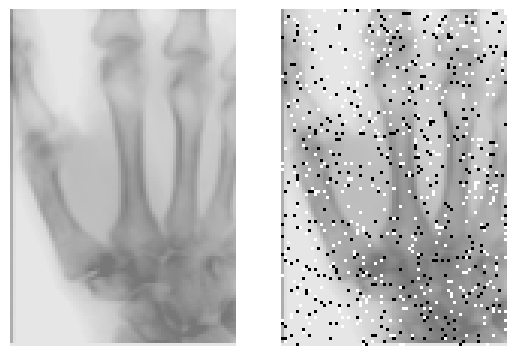

In [ ]:
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np

# subsample the image by 4x, so that the noise is more visible
I_xray = imread('xray_image.png')[::4,::4]

# add salt and pepper noise
I_xray_noise = I_xray.copy()
I_xray_noise[np.random.random(I_xray.shape)>0.95] = 0
I_xray_noise[np.random.random(I_xray.shape)>0.95] = 255


plt.subplot(121)
plt.imshow(I_xray, cmap='gray', vmin=0, vmax=255);plt.axis('off')
plt.subplot(122)
plt.imshow(I_xray_noise, cmap='gray', vmin=0, vmax=255);plt.axis('off')

### Filtering
(not to worry about the border for now)

In [ ]:
# patch half size
psz_h = 1

# make sure to copy, otherwise they reference the same memory (same variable)
I_xray_denoise = I_xray_noise.copy()
im_size = I_xray_denoise.shape

for row in range(psz_h, im_size[0]-psz_h):
    for col in range(psz_h, im_size[1]-psz_h):
        patch = I_xray_noise[row-psz_h : row+psz_h+1, col-psz_h : col+psz_h+1]
        I_xray_denoise[row, col] = np.median(patch)

plt.subplot(131)
plt.imshow(I_xray, cmap='gray', vmin=0, vmax=255);plt.axis('off');plt.title('clean')
plt.subplot(132)
plt.imshow(I_xray_noise, cmap='gray', vmin=0, vmax=255);plt.axis('off');plt.title('noisy')
plt.subplot(133)
plt.imshow(I_xray_denoise, cmap='gray', vmin=0, vmax=255);plt.axis('off');plt.title('median filter result')

## 3.2 Convolution

We mentioned in class that on the patch-level, the definition of **convolution** is the **dot product** of the **flipped**  kernel. With such definition, the convolution operation is commutatitve. Let's reproduce the first two columns of the illustration below [(Source: Wikipedia)](https://en.wikipedia.org/wiki/Convolution).

<img height=300 src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Comparison_convolution_correlation.svg/512px-Comparison_convolution_correlation.svg.png">

First, let's create the 1D array (curve): `f` and `g`.

In [ ]:
f = np.zeros(31)
f[10:20] = 10
g = np.zeros(31)
g[10:20] = 10*np.linspace(0,1,10)[::1]

plt.rcParams["figure.figsize"] = (5,2)
plt.subplot(1,2,1)
plt.plot(f, 'r')
plt.axis('equal')
plt.subplot(1,2,2)
plt.plot(g, 'b')
plt.axis('equal')
plt.show()

Let's compare the `sliding dot product` and the `convolution` (sliding flipped dot product)

In [ ]:
def filter1dSamePadZero(signal, kernel, operation):
  # "same" + "0 padding" the input signal
  patch_sz = len(kernel)
  patch_sz_h = patch_sz // 2
  signal_pad = np.zeros(len(signal) + 2*patch_sz_h)
  signal_pad[patch_sz_h : -patch_sz_h] = signal

  # filtering
  output = np.zeros(len(signal))
  for i in range(len(signal)):
      output[i] = operation(signal_pad[i:i+patch_sz], kernel)
  return output

def dotproduct1d(ff, gg):
  return np.dot(ff, gg)

def conv1d(ff, gg):
  return np.dot(ff, gg[::-1])

plt.rcParams["figure.figsize"] = (5,3)
plt.subplot(2,2,1)
plt.plot(filter1dSamePadZero(f, g, conv1d))
plt.title('f conv g')
plt.axis('off')
plt.subplot(2,2,2)
plt.plot(filter1dSamePadZero(g, f, conv1d))
plt.title('g conv f')
plt.axis('off')

plt.subplot(2,2,3)
plt.plot(filter1dSamePadZero(f, g, dotproduct1d))
plt.title('f dotproduct g')
plt.axis('off')

plt.subplot(2,2,4)
plt.plot(filter1dSamePadZero(g, f, dotproduct1d))
plt.title('g dotproduct f')
plt.axis('off')
plt.show()

# [10 pts] Exercise

## (1) [4 pts] Numpy Basics
The class CSCI 3397 has `num_students` students. Each student has `num_grades` grades, one for each assignment.
The staff store our grades in a numpy ndarray, of shape `(num_students, num_grades)`. (Each row is a student, each column is an assignment)

(a) [1 pt] Create an ndarray of the proper shape to hold the grades table, and fill it with random values between 70 and 100. Hint: check out `np.random.random()` from above

In [ ]:
import numpy as np
import pandas as pd
num_students = 10
num_grades = 3

students = (num_students, num_grades)
grades_table = 70 + np.random.random(students) * 30

organized_grades = pd.DataFrame(grades_table, columns=[[f'Assignment {i}' for i in range(3)]], index=[f'Student {i}' for i in range(0,10)])

print(organized_grades)

          Assignment 0 Assignment 1 Assignment 2
Student 0    97.085975    73.141715    82.099192
Student 1    92.828343    78.457496    85.449571
Student 2    74.365466    83.667786    96.416336
Student 3    75.641761    92.806894    95.710875
Student 4    81.744571    86.316663    81.519996
Student 5    94.083839    74.801411    95.635617
Student 6    90.497722    91.979871    91.640886
Student 7    76.160919    73.165510    78.949449
Student 8    99.922487    91.638959    79.504629
Student 9    84.587342    95.912218    96.484309


(b) [1 pt] Gabe's student index is `4` and we want to see how he's doing in the class. Use ndarray slicing to get an array containing all of his grades.

In [ ]:
#### select a row

gabe_grades = grades_table[4]
print('Gabe\'s grades are:', gabe_grades)

Gabe's grades are: [81.74457057 86.31666322 81.51999578]


(c) [1 pt] Prof. Wei wants to know if pset 2 (assignment index 2) is too hard. Use ndarray slicing to extract the whole classes grades for pset 2.

In [ ]:
#### select a column

pset2_grades = grades_table[0:, 2]
print('Pset2 grades are:', pset2_grades)

Pset2 grades are: [82.09919218 85.44957137 96.41633635 95.71087463 81.51999578 95.63561664
 91.64088627 78.94944867 79.50462898 96.48430895]


(d) [1 pt] Prof. Wei wants to give everyone 20 points as extra credits (yay!) Please update the grades table and cap the maximum points as 100 (i.e., for grades more than 100, set them to 100)

In [ ]:
#### change the grades_table values

grades_table_new = np.minimum(grades_table + 20, 100)
df = pd.DataFrame(grades_table_new, columns=[[f'Assignment {i}' for i in range(3)]], index=[f'Student {i}' for i in range(0,10)])
print(df)

          Assignment 0 Assignment 1 Assignment 2
Student 0   100.000000    93.141715   100.000000
Student 1   100.000000    98.457496   100.000000
Student 2    94.365466   100.000000   100.000000
Student 3    95.641761   100.000000   100.000000
Student 4   100.000000   100.000000   100.000000
Student 5   100.000000    94.801411   100.000000
Student 6   100.000000   100.000000   100.000000
Student 7    96.160919    93.165510    98.949449
Student 8   100.000000   100.000000    99.504629
Student 9   100.000000   100.000000   100.000000


## (2) [3 pts] Auto-contrast with outlier handling

- [1 pt] step 1 : threshold the image into the range [120,160]
- [2 pts] step 2: scale the image into [0,255]


Image data type uint16


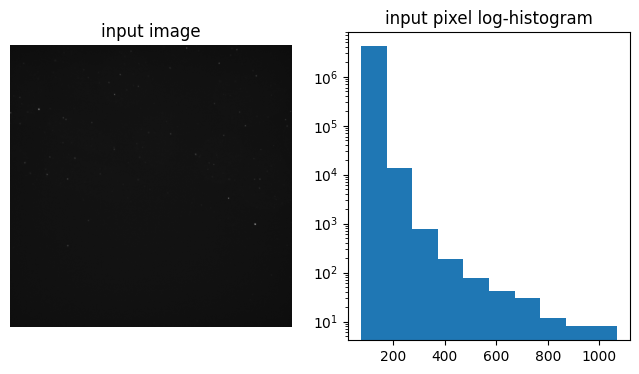

In [ ]:
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np

# subsample the image by 4x, so that the noise is more visible
I_microscopy = np.load('microscopy_image.npy')
print('Image data type', I_microscopy.dtype)

plt.figure(figsize=(8, 4))

# show the image
plt.subplot(121)
plt.imshow(I_microscopy, cmap='gray')
plt.axis('off')
plt.title('input image')

# show the pixel log-histogram
plt.subplot(122)
plt.hist(I_microscopy.reshape(-1))
plt.yscale('log')
plt.title('input pixel log-histogram')

plt.show()

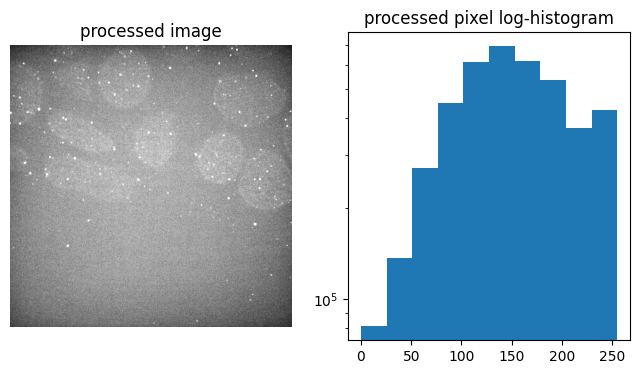

In [ ]:
# step 1. threshold the image into range [120,160]
# saturate the outlier pixels
thresholded_image = np.clip(I_microscopy, 120, 160)
# saturate the outlier pixels
saturated = np.clip(thresholded_image, 0, 255)

# step 2. scale the image into range [0,255]
I_microscopy_out = (saturated - saturated.min()) * (255 / (saturated.max() - saturated.min()))

# visualization code
plt.figure(figsize=(8, 4))

# show the image
plt.subplot(121)
plt.imshow(I_microscopy_out, cmap='gray')
plt.axis('off')
plt.title('processed image')

# show the pixel log-histogram
plt.subplot(122)
plt.hist(I_microscopy_out.reshape(-1))
plt.yscale('log')
plt.title('processed pixel log-histogram')

plt.show()

## (3) [3 pts] Sharpening filter

Implement the "sharpening filter".

- step 1: create a convolution kernel matrix (3x3)
- step 2: copy & paste the median filter code for the "filtering"
- step 3: change the patch-level function

BTW, the filter size can be any size. we are using 3x3 for simplicity

<ipython-input-23-8561c291b189>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  I_xray = imread('xray_image.png')[::4,::4]


Text(0.5, 1.0, 'Sharpened')

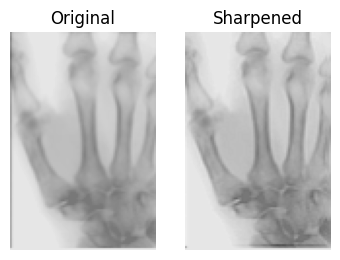

In [ ]:
I_xray = imread('xray_image.png')[::4,::4]
# make sure to copy, otherwise they reference the same memory (same variable)
I_xray_sharp = I_xray.copy()

# Step 1: Create the kernel matrix
sharpen_kernel = np.array([[-1, -1, -1],
                           [-1, 17, -1],
                           [-1, -1, -1]]) / 9

# patch half size
psz_h = 1

# make sure to copy, otherwise they reference the same memory (same variable)
im_size = I_xray_sharp.shape

#step 2: copy & paste the median filter code for the "filtering"
for row in range(psz_h, im_size[0]-psz_h):
    for col in range(psz_h, im_size[1]-psz_h):
        patch = I_xray[row-psz_h : row+psz_h+1, col-psz_h : col+psz_h+1]
        # Perform the convolution operation
        I_xray_sharp[row-psz_h, col-psz_h] = np.sum(patch * sharpen_kernel)

# Step 3: Display the images
plt.subplot(131)
plt.imshow(I_xray, cmap='gray', vmin=0, vmax=255);plt.axis('off');plt.title('Original')
plt.subplot(132)
plt.imshow(I_xray_sharp, cmap='gray', vmin=0, vmax=255);plt.axis('off');plt.title('Sharpened')
